In [1]:
import numpy as np
import torch
import torch.nn as nn
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from src.dnn import *
from tqdm.notebook import tqdm
import time
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
x = np.linspace(0, 1, 10).reshape(-1,1)
y = 0.9*np.exp(-10*(x-0.5)**2)

In [3]:
def identity(z):
    return z

In [6]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = CLayer(n_inputs=1, n_outputs=3, activation = nn.Sigmoid())
layer2 = CLayer(n_inputs=3, n_outputs=1, activation = identity)
layers = [layer1, layer2]

optimizer = Adam(lr=0.01)
network = QNN(layers, optimizer)

<IPython.core.display.Javascript object>


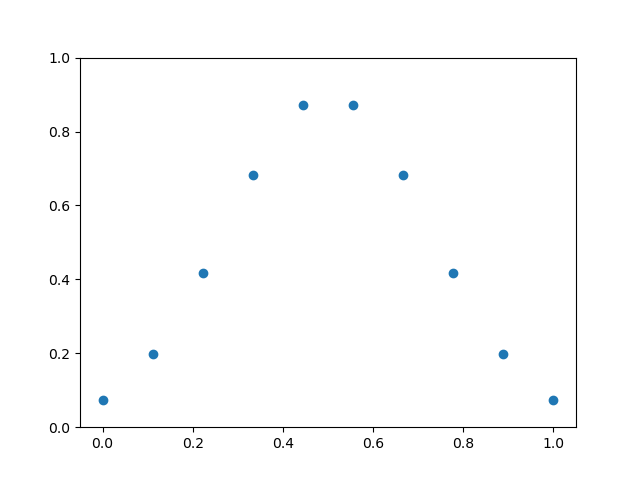

[[0.29009667]
 [0.59572285]
 [0.44686624]
 [1.        ]]
[[0.         0.         0.        ]
 [0.2059406  0.24083714 0.2471768 ]]
[[0.28659922]
 [0.5906704 ]
 [0.4354825 ]
 [1.        ]]
[[0.02271779 0.02686432 0.02731528]
 [0.2044601  0.24177888 0.2458375 ]]
[[0.28312713]
 [0.5855988 ]
 [0.42416638]
 [1.        ]]
[[0.04510359 0.0539273  0.05427762]
 [0.20296615 0.24267285 0.24424927]]
[[0.2796806 ]
 [0.5805089 ]
 [0.41292915]
 [1.        ]]
[[0.06715313 0.08117278 0.08080623]
 [0.20145936 0.24351832 0.24241866]]
[[0.27625987]
 [0.5754018 ]
 [0.401782  ]
 [1.        ]]
[[0.08886237 0.10858425 0.10682365]
 [0.19994034 0.24431457 0.24035321]]
[[0.27286512]
 [0.57027864]
 [0.39073545]
 [1.        ]]
[[0.11022764 0.13614495 0.13225627]
 [0.19840975 0.2450609  0.23806126]]
[[0.26949656]
 [0.5651403 ]
 [0.3797998 ]
 [1.        ]]
[[0.13124545 0.16383784 0.1570346 ]
 [0.19686817 0.24575675 0.23555191]]
[[0.26615438]
 [0.5599879 ]
 [0.36898482]
 [1.        ]]
[[0.15191261 0.19164558 0.1810939

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in tqdm(range(1)):
    
    network.backward(x, y)
    network.step()
    
    y_pred = []
    for x_ in x:
        network(x_.reshape(1,-1))
        y_pred.append(network.a[-1][0,:])

    y_pred = np.array(y_pred)

    loss = np.mean((y_pred - y)**2)
    print(loss)

    ax.clear()
    ax.plot(x, y, "o")
    ax.plot(x, y_pred, "o")
    ax.set_ylim([0, 1])
    fig.canvas.draw()